In [2]:
# Mount Google Drive untuk mengakses file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import library yang diperlukan
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
# One-hot encoding untuk klasifikasi biner (tumor atau normal)
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [5]:
# Inisialisasi list untuk menyimpan data dan label
data = []
paths = []
result = []

# Proses gambar dengan tumor
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

# Load dan proses gambar, update list data dan result
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [6]:
# Proses gambar tanpa tumor
paths = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

In [7]:
# Load dan proses gambar, update list data dan result
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
# Konversi list data dan result ke dalam array numpy
data = np.array(data)
result = np.array(result)
result = result.reshape(139,2)

In [9]:
# Bagi data menjadi data latih dan data uji
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:

# Bangun model Convolutional Neural Network (CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
# Latih model
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 20.7576 - val_loss: 64.4504
Epoch 2/30
3/3 [==============================] - 10s 3s/step - loss: 12.1191 - val_loss: 126.2350
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 7.3778 - val_loss: 24.6373
Epoch 4/30
3/3 [==============================] - 9s 2s/step - loss: 10.8873 - val_loss: 30.3437
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 4.2950 - val_loss: 37.4244
Epoch 6/30
3/3 [==============================] - 9s 2s/step - loss: 2.9661 - val_loss: 25.6598
Epoch 7/30
3/3 [==============================] - 9s 3s/step - loss: 1.1602 - val_loss: 9.0830
Epoch 8/30
3/3 [==============================] - 8s 2s/step - loss: 0.6828 - val_loss: 8.5087
Epoch 9/30
3/3 [==============================] - 10s 4s/step - loss: 1.0816 - val_loss: 8.4243
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.3336 - val_loss: 8.3899
Epoch 11/30
3/3 [===================

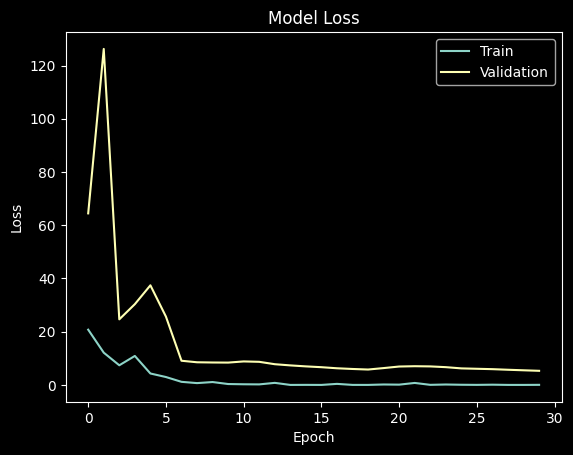

In [12]:
# Plot loss pada data latih dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Muat model yang sudah dilatih sebelumnya
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/model.h5')


In [16]:
# Klasifikasi gambar dengan tumor
img_path = "/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/DataTest1.jpg"
img = Image.open(img_path)
x = np.array(img.resize((128, 128)))
x = x.reshape(1, 128, 128, 3)
res = loaded_model.predict_on_batch(x)
classification = np.argmax(res, axis=1)[0]

100.00% Confidence This Is Normal


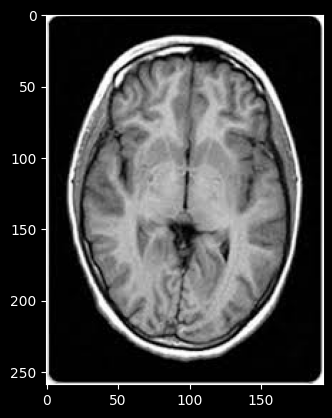

In [17]:
# Tampilkan gambar dan prediksi
plt.imshow(img)
class_names = ["Tumor", "Normal"]
confidence = res[0][classification] * 100
print(f"{confidence:.2f}% Confidence This Is {class_names[classification]}")

In [18]:
# Klasifikasi gambar lainnya
img_path = "/content/drive/MyDrive/Colab Notebooks/Klasifikasi Tumor Otak - Praktikum Sistem Multimedia/cobain.jpeg"
img = Image.open(img_path)
x = np.array(img.resize((128, 128)))
x = x.reshape(1, 128, 128, 3)
res = loaded_model.predict_on_batch(x)
classification = np.argmax(res, axis=1)[0]

100.00% Confidence This Is Tumor


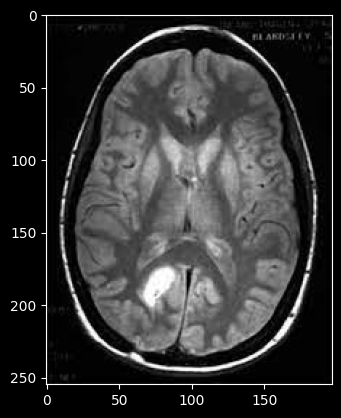

In [19]:
# Tampilkan gambar dan prediksi
plt.imshow(img)
confidence = res[0][classification] * 100
print(f"{confidence:.2f}% Confidence This Is {class_names[classification]}")